<a href="https://colab.research.google.com/github/luclucs/Faculdade/blob/main/05102023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install chart_studio
import chart_studio
import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='luclucs', api_key='JeAzU5m5DBtUelFN4ILq')


# Carregar um arquivo CSV em um DataFrame
df = pd.read_csv('/content/Games.csv')

colunas = df.columns.tolist()
print(colunas)

['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer', 'Publisher']


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Classificar o DataFrame pelos jogos mais vendidos
df_top_10 = df.sort_values(by='Sales', ascending=False).head(10)

# Criar um gráfico de barras horizontais com Plotly Express
fig = px.bar(df_top_10, x='Sales', y='Name', orientation='h',
             labels={'Name': 'Nome do Jogo', 'Sales': 'Vendas (milhões)'},
             title='Top 10 Jogos Mais Vendidos')

# Personalizar os textos nas barras
fig.update_traces(text=df_top_10['Sales'].apply(lambda x: f'{x:.2f} milhões'))

py.iplot(fig, filename='histograma-vendas-jogos-pc')


In [ ]:
# Jogos mais vendidos
# Ordenar o DataFrame pelos jogos mais vendidos (maior número de vendas)
jogos_mais_vendidos = df.sort_values(by='Sales', ascending=False)

# Exibir os jogos mais vendidos
print('Os jogos mais vendidos são:')
print(jogos_mais_vendidos[['Name', 'Sales']].head())

# Se desejar, você pode salvar essa informação em um novo DataFrame ou arquivo, por exemplo:
# jogos_mais_vendidos.to_csv('jogos_mais_vendidos.csv', index=False)

Os jogos mais vendidos são:
                            Name  Sales
0  PlayerUnknown's Battlegrounds   42.0
1                      Minecraft   33.0
2                     Diablo III   20.0
3                    Garry's Mod   20.0
4                       Terraria   17.2


In [ ]:
# Qual o gênero preferido do consumidor na hora de escolher um jogo para comprar?

import pandas as pd
import plotly.express as px

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Agregar as vendas por gênero
genre_sales = df.groupby('Genre')['Sales'].sum().reset_index()

# Classificar os gêneros pelas vendas
genre_sales = genre_sales.sort_values(by='Sales', ascending=False).head(5)

# Criar um gráfico de barras com Plotly Express
fig = px.bar(genre_sales, x='Sales', y='Genre',
             labels={'Genre': 'Gênero', 'Sales': 'Vendas (milhões)'},
             title='Top 5 Gêneros Mais Vendidos')

# Personalizar os textos nas barras
fig.update_traces(text=genre_sales['Sales'].apply(lambda x: f'{x:.2f} milhões'))

# Enviar o gráfico para o Chart Studio
py.plot(fig, filename='top-5-generos-mais-vendidos')


'https://plotly.com/~luclucs/25/'

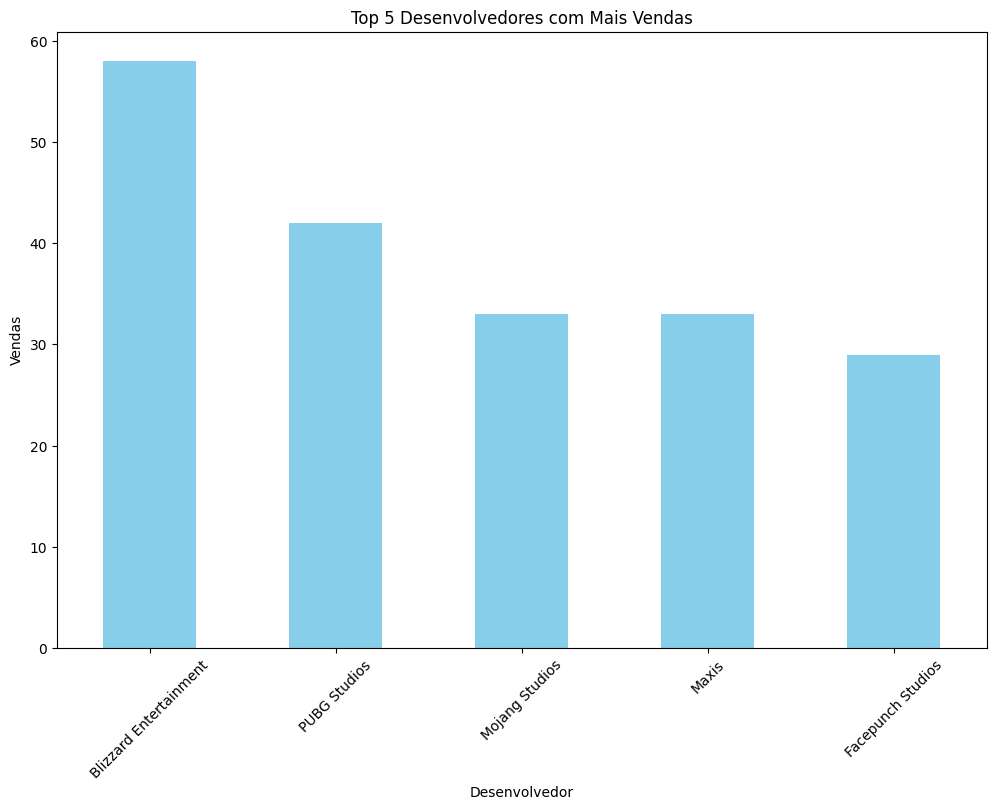

In [ ]:
# Qual dentre os desenvolvedores obteve mais vendas?

import pandas as pd
import plotly.express as px

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Agregar as vendas por desenvolvedor
developer_sales = df.groupby('Developer')['Sales'].sum().reset_index()

# Classificar os desenvolvedores pelas vendas
developer_sales = developer_sales.sort_values(by='Sales', ascending=False).head(5)

# Criar um gráfico de barras com Plotly Express
fig = px.bar(developer_sales, x='Sales', y='Developer',
             labels={'Developer': 'Desenvolvedor', 'Sales': 'Vendas (milhões)'},
             title='Top 5 Desenvolvedores com Mais Vendas')

# Personalizar os textos nas barras
fig.update_traces(text=developer_sales['Sales'].apply(lambda x: f'{x:.2f} milhões'))

# Enviar o gráfico para o Chart Studio
py.plot(fig, filename='top-5-desenvolvedores-mais-vendidos')


In [ ]:
# Jogos com data de lançamento mais antigas tendem a terem números de vendas superiores aos mais recentes pelo tempo?

import pandas as pd
import plotly.express as px

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Converter as datas de "Mês-Ano" para ano (por exemplo, "Dec-17" para 2017)
df['Release'] = pd.to_datetime(df['Release'], format='%b-%y').dt.year

# Definir os intervalos de tempo desejados
intervals = [1985, 1990, 1995, 2000, 2005, 2010, 2015, 2017]

# Criar uma nova coluna no DataFrame para categorizar os dados nos intervalos
df['Release Interval'] = pd.cut(df['Release'], bins=intervals, labels=intervals[:-1])

# Agregar as vendas por intervalo de tempo
interval_sales = df.groupby('Release Interval')['Sales'].sum().reset_index()

# Criar um gráfico de barras com Plotly Express
fig = px.bar(interval_sales, x='Release Interval', y='Sales',
             labels={'Release Interval': 'Intervalo de Ano', 'Sales': 'Vendas (milhões)'},
             title='Relação entre Intervalo de Ano e Vendas')

# Enviar o gráfico para o Chart Studio
py.plot(fig, filename='relacao-intervalo-ano-vendas')



'https://plotly.com/~luclucs/29/'

In [ ]:
# Qual o menor intervalo de lançamentos entre as empresas?
import pandas as pd
df = pd.read_csv('/content/Games.csv')

df['Release'] = pd.to_datetime(df['Release'], format='%b-%y', errors='coerce')
empresas_com_mais_de_um_jogo = df['Developer'].value_counts().index[df['Developer'].value_counts() > 1]
df_filtrado = df[df['Developer'].isin(empresas_com_mais_de_um_jogo)]
df_filtrado = df_filtrado.sort_values(by=['Developer', 'Release'])
df_filtrado['Intervalo'] = df_filtrado.groupby('Developer')['Release'].diff().dt.days

menor_intervalo_por_empresa = df_filtrado.groupby('Developer')['Intervalo'].min()
print(menor_intervalo_por_empresa)


Developer
ArenaNet                      2679.0
Ascaron                        152.0
BioWare                        638.0
Blizzard Entertainment         304.0
Blizzard North                1278.0
Bohemia Interactive             91.0
Bullfrog Productions          5844.0
CD Projekt Red                1308.0
Capcom                          62.0
Crytek                        1340.0
EA DICE                        547.0
Ensemble Studios               700.0
Epic Games                     549.0
Facepunch Studios             4110.0
Firaxis Games                 1461.0
Firefly Studios                273.0
FromSoftware                   608.0
Frontier Developments         4414.0
Gas Powered Games             1767.0
Haemimont Games                396.0
Illusion Softworks             426.0
Impressions Game               396.0
LucasArts                      516.0
Max Design                    1642.0
Maxis                          273.0
MicroProse                     182.0
Paradox Development Studio  

In [ ]:
import pandas as pd
import chart_studio.plotly as py

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Converter as datas de "Mês-Ano" para ano (por exemplo, "Dec-17" para 2017)
df['Release'] = pd.to_datetime(df['Release'], format='%b-%y').dt.year

# Classificar o DataFrame por empresa e data de lançamento
df_sorted = df.sort_values(by=['Developer', 'Release'])

# Calcular o intervalo de lançamento entre jogos da mesma empresa
df_sorted['Intervalo'] = df_sorted.groupby('Developer')['Release'].diff()

# Encontrar o menor intervalo de lançamento para cada empresa
min_intervals = df_sorted.groupby('Developer')['Intervalo'].min().reset_index()

# Criar um gráfico de barras com Plotly Express
fig = px.bar(min_intervals, x='Developer', y='Intervalo', text='Intervalo',
             labels={'Developer': 'Desenvolvedor', 'Intervalo': 'Intervalo (anos)'},
             title='Menor Intervalo de Lançamento entre Jogos por Desenvolvedor')

# Enviar o gráfico para o Chart Studio
py.plot(fig, filename='menor-intervalo-lancamento-desenvolvedor')


'https://plotly.com/~luclucs/34/'

In [ ]:
# Qual empresa cresceu mais em vendas ao longo dos anos?
import pandas as pd

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Converter a coluna 'Release' para o tipo de data
df['Release'] = pd.to_datetime(df['Release'], format='%b-%y', errors='coerce')

# Filtrar as linhas com datas de lançamento válidas
df = df[df['Release'].notna()]

# Agrupar os dados por empresa e ano, calculando as vendas totais
vendas_por_empresa_ano = df.groupby(['Developer', df['Release'].dt.year])['Sales'].sum().reset_index()

# Calcular o crescimento percentual das vendas para cada empresa ao longo dos anos
vendas_por_empresa_ano['Crescimento'] = vendas_por_empresa_ano.groupby('Developer')['Sales'].pct_change() * 100

# Encontrar a empresa com o maior crescimento percentual
empresa_maior_crescimento = vendas_por_empresa_ano.groupby('Developer')['Crescimento'].mean().idxmax()
maior_crescimento = vendas_por_empresa_ano.groupby('Developer')['Crescimento'].mean().max()

# Exibir a empresa com o maior crescimento percentual
print(f"A empresa com o maior crescimento em vendas foi {empresa_maior_crescimento} com um crescimento médio de {maior_crescimento:.2f}% ao longo dos anos.")


A empresa com o maior crescimento em vendas foi CD Projekt Red com um crescimento médio de 145.83% ao longo dos anos.


In [ ]:
import pandas as pd
import chart_studio.plotly as py

# Carregar a base de dados
df = pd.read_csv('/content/Games.csv')

# Converter as datas de "Mês-Ano" para ano (por exemplo, "Dec-17" para 2017)
df['Release'] = pd.to_datetime(df['Release'], format='%b-%y').dt.year

# Calcular a taxa média de crescimento de vendas para cada empresa
sales_by_company_and_year = df.groupby(['Developer', 'Release'])['Sales'].sum().reset_index()
sales_by_company_and_year['Growth Rate'] = sales_by_company_and_year.groupby('Developer')['Sales'].pct_change() * 100

# Encontrar as Top 10 empresas com as maiores taxas médias de crescimento
top_10_companies = sales_by_company_and_year.groupby('Developer')['Growth Rate'].mean().nlargest(10)

# Criar um gráfico de barras para visualizar as Top 10 empresas
fig = px.bar(top_10_companies, x=top_10_companies.index, y=top_10_companies.values,
             labels={'x': 'Desenvolvedor', 'y': 'Taxa Média de Crescimento de Vendas (%)'},
             title='Top 10 Empresas com Maior Crescimento Médio de Vendas ao Longo dos Anos')

# Enviar o gráfico para o Chart Studio
py.plot(fig, filename='top-10-empresas-crescimento-vendas')



'https://plotly.com/~luclucs/40/'